In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import itertools
import numpy as np
from matplotlib import pyplot as plt

In [8]:
df=pd.read_csv('news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [9]:
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [10]:
xtrain,xtest,ytrain,ytest=train_test_split(df['text'],labels,test_size=0.1,random_state=7)

In [11]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(xtrain)  
tfidf_test = tfidf_vectorizer.transform(xtest)

In [12]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,ytrain)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(ytest,y_pred)
print(f'Accuracy : {round((score*100),2)}%')

Accuracy : 94.95%


In [13]:
cm = confusion_matrix(ytest,y_pred,labels=['FAKE','REAL'])

Confusion matrix, without normalization
[[297  16]
 [ 16 305]]


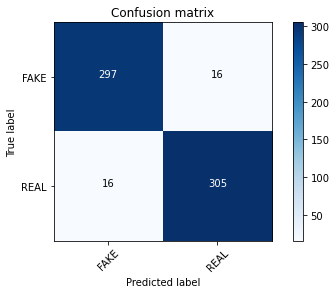

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])
print(cm)

In [15]:
def print_pred(vectorizer, classifier, n=30):
    

    class_labels = classifier.classes_
    feature_names = vectorizer.get_feature_names()
    topn_class1 = sorted(zip(classifier.coef_[0], feature_names))[:n]
    topn_class2 = sorted(zip(classifier.coef_[0], feature_names))[-n:]

    for coef, feat in topn_class1:
        print(class_labels[0], coef, feat)

    print()

    for coef, feat in reversed(topn_class2):
        print(class_labels[1], coef, feat)


print_pred(tfidf_vectorizer,pac,n=100)

FAKE -5.956091712913019 2016
FAKE -4.872300994204637 october
FAKE -3.5891165886782894 hillary
FAKE -3.509735622223696 share
FAKE -3.4400266001331627 article
FAKE -3.1926406566384746 november
FAKE -2.867586974642148 advertisement
FAKE -2.8415853353086398 source
FAKE -2.733323608990314 snip
FAKE -2.7274878460250216 print
FAKE -2.634334761239549 election
FAKE -2.5759337646112686 establishment
FAKE -2.294649134039989 podesta
FAKE -2.2860965725122138 oct
FAKE -2.2745754647665883 wikileaks
FAKE -2.218289941932104 mosul
FAKE -2.187050787764132 photo
FAKE -2.1097507742907684 28
FAKE -2.0677800848758787 fbi
FAKE -2.0472684917735675 corporate
FAKE -2.035322825031645 email
FAKE -2.024444082884849 uk
FAKE -1.9998325138223916 26
FAKE -1.9225559208363125 watch
FAKE -1.7933997831306066 published
FAKE -1.7810318543972916 pipeline
FAKE -1.7448614256140431 daesh
FAKE -1.7313627044807303 obamacare
FAKE -1.7283852887596896 dakota
FAKE -1.719693610113341 just
FAKE -1.705832621547535 ayotte
FAKE -1.65556702